In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import all necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

from sklearn.metrics.classification import accuracy_score, log_loss

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ckd_with_Tonmoi/Dataset/ckd_final_dataset.csv')
df.shape

(400, 26)

In [ ]:
df.isnull().sum()

id                         0
age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
df.drop(['id'], axis = 1,inplace=True) 

In [ ]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
X = df.iloc[:, 0:-1].values

In [ ]:
X

array([[48.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  0.   ,  0.   ]])

In [ ]:
y= df['class']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [ ]:
## Scaling Train Data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
X_scale = scalar.fit_transform(X)

In [ ]:
X_scale

array([[-0.21003135,  0.25421378,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62723421, -1.97247624,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.615355  ,  0.25421378, -1.4210744 , ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33245337,  0.25421378,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03767254, -1.23024623,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37953033,  0.25421378,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [ ]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20, random_state=42)

In [ ]:
print('shape of X_trian: ', X_train.shape)
print('shape of X_test: ', X_test.shape)
print('shape of y_train: ',y_train.shape)
print('shape of y_test: ',y_test.shape)

shape of X_trian:  (320, 24)
shape of X_test:  (80, 24)
shape of y_train:  (320,)
shape of y_test:  (80,)


### Applying Naive Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict = nb.predict(X_test) 
probability = nb.predict_proba(X_test)
print('Log loss for NB: ', log_loss(y_test,probability))
print('Simple Accuracy of NB : ', nb.score(X_test,y_test))
print('Precision score for NB: ', precision_score(y_test, nb_predict))
print('Recall score for NB : ', recall_score(y_test, nb_predict))
print('f1 score for NB : ', f1_score(y_test, nb_predict))

Log loss for NB:  0.43173470493638444
Simple Accuracy of NB :  0.9875
Precision score for NB:  0.9655172413793104
Recall score for NB :  1.0
f1 score for NB :  0.9824561403508771


# Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test) 
probability = knn.predict_proba(X_test)
print('Log loss for knn: ', log_loss(y_test,probability))
print('Simple Accuracy of knn : ', knn.score(X_test,y_test))
print('Precision score for knn: ', precision_score(y_test, knn_predict))
print('Recall score for knn : ', recall_score(y_test, knn_predict))
print('f1 score for knn : ', f1_score(y_test, knn_predict))


Log loss for knn:  0.45053567239608794
Simple Accuracy of knn :  0.975
Precision score for knn:  0.9333333333333333
Recall score for knn :  1.0
f1 score for knn :  0.9655172413793104


# Logistic Regression

In [ ]:
#LR model with default value and using Bag-of-word
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

clf = SGDClassifier( loss='log', random_state=45)
clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)
lr_predict = clf.predict(X_test) 

probability = sig_clf.predict_proba(X_test)
print('Log loss for LR: ', log_loss(y_test,probability))
print('Simple Accuracy of LR : ', clf.score(X_test,y_test))
print('Precision score for LR : ', precision_score(y_test, lr_predict))
print('Recall score for LR : ', recall_score(y_test, lr_predict, ))
print('f1 score for LR : ', f1_score(y_test, lr_predict))

Log loss for LR:  0.08613095509271196
Simple Accuracy of LR :  0.9875
Precision score for LR :  0.9655172413793104
Recall score for LR :  1.0
f1 score for LR :  0.9824561403508771


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logreg, method="sigmoid")
sig_clf.fit(X_train,y_train)
lr_predict = logreg.predict(X_test) 

probability = sig_clf.predict_proba(X_test)

print('Log loss for LR: ', log_loss(y_test,probability))
print('Simple Accuracy of LR : ', logreg.score(X_test,y_test))
print('Precision score for LR : ', precision_score(y_test, lr_predict))
print('Recall score for LR : ', recall_score(y_test, lr_predict, ))
print('f1 score for LR : ', f1_score(y_test, lr_predict))

Log loss for LR:  0.07654200189068319
Simple Accuracy of LR :  0.9875
Precision score for LR :  0.9655172413793104
Recall score for LR :  1.0
f1 score for LR :  0.9824561403508771


## Applying SVM

In [ ]:
#LR model with default value and using Bag-of-word
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

svm = SGDClassifier( loss='hinge', random_state=45)
svm.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)
svm_predict = clf.predict(X_test) 

probability = sig_clf.predict_proba(X_test)
print('Log loss for LR: ', log_loss(y_test,probability))
print('Simple Accuracy of LR : ', svm.score(X_test,y_test))
print('Precision score for LR : ', precision_score(y_test, svm_predict))
print('Recall score for LR : ', recall_score(y_test, svm_predict, ))
print('f1 score for LR : ', f1_score(y_test, svm_predict))

Log loss for LR:  0.08613095509271196
Simple Accuracy of LR :  0.9875
Precision score for LR :  0.9655172413793104
Recall score for LR :  1.0
f1 score for LR :  0.9824561403508771


## Applying DT

In [ ]:
# Decesion Tree 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test) 
probability = dt.predict_proba(X_test)
print('Log loss for DT: ', log_loss(y_test,probability))
print('Simple Accuracy of DT : ', dt.score(X_test,y_test))
print('Precision score for DT : ', precision_score(y_test, dt_predict))
print('Recall score for DT : ', recall_score(y_test, dt_predict))
print('f1 score for DT : ', f1_score(y_test, dt_predict))

Log loss for DT:  9.992007221626413e-16
Simple Accuracy of DT :  1.0
Precision score for DT :  1.0
Recall score for DT :  1.0
f1 score for DT :  1.0


## Applying RF

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test) 
probability = rf.predict_proba(X_test)
print('Log loss for DT: ', log_loss(y_test,probability))
print('Simple Accuracy of DT : ', rf.score(X_test,y_test))
print('Precision score for DT : ', precision_score(y_test, rf_predict))
print('Recall score for DT : ', recall_score(y_test, rf_predict))
print('f1 score for DT : ', f1_score(y_test, rf_predict))

Log loss for DT:  0.028190630444653808
Simple Accuracy of DT :  1.0
Precision score for DT :  1.0
Recall score for DT :  1.0
f1 score for DT :  1.0


## Applying XGBoost

In [ ]:
# XGBoost
xg_boost = XGBClassifier() 
xg_boost.fit(X_train,y_train)
xg_boost_predict = xg_boost.predict(X_test) 
probability = xg_boost.predict_proba(X_test)
print('Log loss for xgboost: ', log_loss(y_test,probability))
print('Simple Accuracy of xgboost : ', xg_boost.score(X_test,y_test))
print('Precision score for xgboost : ', precision_score(y_test, xg_boost_predict))
print('Recall score for xgboost: ', recall_score(y_test, xg_boost_predict))
print('f1 score for xgboost : ', f1_score(y_test, xg_boost_predict))

Log loss for xgboost:  0.022686660109320654
Simple Accuracy of xgboost :  0.9875
Precision score for xgboost :  0.9655172413793104
Recall score for xgboost:  1.0
f1 score for xgboost :  0.9824561403508771


# AUC-ROC curve for all models

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_predict[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, svm_predict[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_predict[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, nb_predict[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, knn_predict[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, dt_predict[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, xg_boost_predict[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

IndexError: ignored

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVM')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(fpr5, tpr5, linestyle='--',color='violet', label='KNN')
plt.plot(fpr6, tpr6, linestyle='--',color='lime', label='Decision Tree')
plt.plot(fpr7, tpr7, linestyle='--',color='aqua', label='Xgboost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

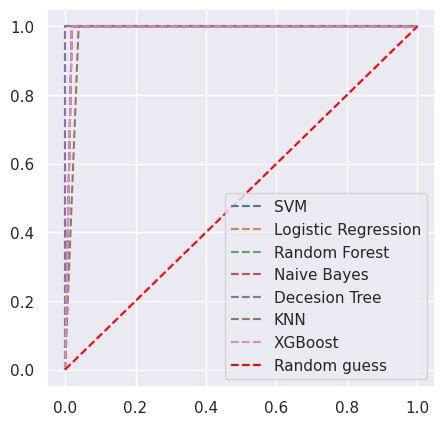

In [ ]:

from sklearn.metrics import roc_curve, auc
#for logistic regression
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lr_predict)
auc_logistic = auc(logistic_fpr, logistic_tpr)
# for svm
svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_predict)
auc_svm = auc(svm_fpr, svm_tpr)
# for random forest
rf_fpr,rf_tpr, threshold = roc_curve(y_test, rf_predict)
auc_rf= auc(rf_fpr, rf_tpr)

#for naive bases
nb_fpr, nb_tpr, threshold = roc_curve(y_test, nb_predict)
auc_nb= auc(nb_fpr, nb_tpr)

# for decision tree
decesiontree_fpr,decesiontree_tpr, threshold = roc_curve(y_test, dt_predict)
auc_decesiontree= auc(decesiontree_fpr, decesiontree_tpr)

#for KNN
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_predict)
auc_knn= auc(knn_fpr, knn_tpr)

#for XGboost
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, xg_boost_predict)
auc_xgb= auc(xgb_fpr, xgb_tpr)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM')
plt.plot(logistic_fpr, logistic_tpr, linestyle='--', label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest')
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes')
plt.plot(decesiontree_fpr, decesiontree_tpr, linestyle='--', label='Decesion Tree')
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN')
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGBoost')
plt.plot(p_fpr,p_tpr,linestyle='--',color='red',label='Random guess')
#plt.title('Compare Roc curve and Auc for all algorithms')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

plt.legend()
plt.savefig('ckd_auc.png')
plt.show()

## Applying Deep learning / ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(24, activation='relu',input_dim= X_train.shape[1]))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=50,verbose=1,validation_split=.1)

Epoch 1/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2141 - accuracy: 0.9792 - val_loss: 0.2236 - val_accuracy: 0.9375
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2049 - accuracy: 0.9792 - val_loss: 0.2167 - val_accuracy: 0.9375
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1965 - accuracy: 0.9826 - val_loss: 0.2101 - val_accuracy: 0.9375
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1883 - accuracy: 0.9826 - val_loss: 0.2042 - val_accuracy: 0.9375
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1808 - accuracy: 0.9861 - val_loss: 0.1985 - val_accuracy: 0.9375
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1737 - accuracy: 0.9861 - val_loss: 0.1931 - val_accuracy: 0.9375
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1670 - accuracy: 0.9861 - val_loss: 0.1879 - val_accuracy: 0.9375
Epoch 8/50
6/6 [=============

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
print(f'Accuracy is: {accuracy_score(y_test,y_pred)}')

Accuracy is: 0.975


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import matplotlib.pyplot as plt
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


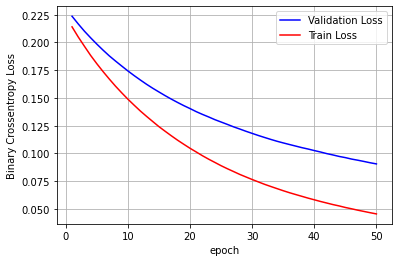

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')


x = list(range(1,50+1))

print(history.history.keys())

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


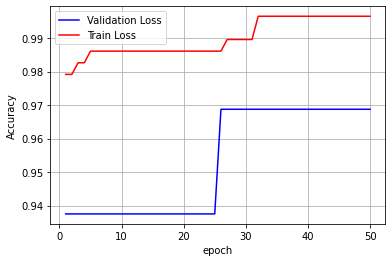

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')


x = list(range(1,50+1))

print(history.history.keys())


vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)